# 2. Análisis de Datos Exproratorio (EDA)

In [29]:
import pandas as pd
import json # Para trabajar con JSON
from pandas import json_normalize
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
# Recarga automática de módulos antes de ejecutar
#%load_ext autoreload
#%autoreload 2

import warnings
warnings.filterwarnings("ignore")

- Chequeo de nulos
- valores duplicados
- valores faltantes
- tipos de datos
- análisis estadistíco de datos
- análisis de correlaciondes bi y multivariado


Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente 👀 ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de recomendación!

similitudes entre películas. Las columnas más útiles para un sistema de recomendación serían:

title: Usada para identificar y mostrar las películas recomendadas.
genres: La similitud en los géneros es clave para agrupar películas con temas similares.
popularity o vote_average: Son columnas de interés para ponderar la relevancia de la recomendación.
overview: Puedes generar una matriz de similitud de texto a partir de descripciones.
cast y crew: Actores o directores similares pueden ayudar a mejorar la relevancia de las recomendaciones.

In [4]:
# Cargamos los datos limpios en un df
df=pd.read_parquet('D:/2024/HenryData/Py_Individual/PI_Recomendacion/Datasets/df_limpio.parquet')

In [5]:
df.head(2)

,id,belongs_to_collection,budget,genres,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,actor,director,return
0,862,Toy Story Collection,30000000,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,1995,Tom Hanks Tim Allen Don Rickles,John Lasseter,12.451801
1,8844,No collecction,65000000,Adventure Fantasy Family,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures Teitler Film Interscope Commu...,United States of America,1995-12-15,262797249.0,104.0,English Français,Jumanji,6.9,2413.0,1995,Robin Williams Jonathan Hyde Kirsten Dunst,Joe Johnston,4.043035


In [6]:
# Información general del DF
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21875 entries, 0 to 21874
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     21875 non-null  int32         
 1   belongs_to_collection  21875 non-null  object        
 2   budget                 21875 non-null  int64         
 3   genres                 21875 non-null  object        
 4   overview               21875 non-null  object        
 5   popularity             21875 non-null  float64       
 6   production_companies   21875 non-null  object        
 7   production_countries   21875 non-null  object        
 8   release_date           21875 non-null  datetime64[ns]
 9   revenue                21875 non-null  float64       
 10  runtime                21853 non-null  float64       
 11  spoken_languages       21875 non-null  object        
 12  title                  21875 non-null  object        
 13  v

In [7]:
# Observamos una descripción estadística de las columnas numéricas
df. describe()

,id,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,21875.000000,2.187500e+04,21875.000000,21875,2.187500e+04,21853.000000,21875.000000,21875.000000,21875.000000,2.187500e+04
mean,109612.290971,8.239313e+06,4.381674,2004-09-30 12:31:45.737142784,2.154692e+07,96.544822,5.667031,198.929509,2004.256549,9.799200e+02
min,3.000000,0.000000e+00,0.000000,1981-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1981.000000,0.000000e+00
25%,18122.500000,0.000000e+00,0.750121,1998-01-01 00:00:00,0.000000e+00,87.000000,5.000000,6.000000,1998.000000,0.000000e+00
50%,50674.000000,0.000000e+00,2.211854,2007-03-28 00:00:00,0.000000e+00,95.000000,5.900000,19.000000,2007.000000,0.000000e+00
75%,173482.000000,2.000000e+06,6.571817,2012-11-02 00:00:00,1.046585e+05,106.000000,6.700000,84.000000,2012.000000,0.000000e+00
max,465044.000000,3.800000e+08,547.488298,2020-12-16 00:00:00,2.787965e+09,1140.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,121397.401254,2.423314e+07,8.004797,NaN,9.016443e+07,33.493147,1.623697,682.421140,9.667968,9.094002e+04


Interpretación: 

- Count: Indica que casi todas las columnas hay 21,875 películas, excepto en la columna runtime 21,853, lo que indica que hay algunas filas con valores faltantes (NaN).

- Mean: Indica el promedio de los valores de las columnas, por ejemplo en budget, el presupuesto promedio de las películas de este conjunto de datos es de aproximadamente 8.24 millones de dólares. En la columna revenue indica que en promedio las películas de este conjunto de datos recaudo 2.15 millones de dólares.

- Min: muestra el valor mínimo en cada columna, por ejemplo en la columnas, budget, revenue; el valor mínimo es 0 los que indica que películas sin presupuesto y recaudación declarado.

- Max: En el caso del budget, indica que el presupuesto más alto registrado en el conjunto de datos es de 3.8 millones de dolares.

- En general la mayoría de las películas tienen un presupuesto bajo o no estan declarados y un número pequeño de películas tienen presupuesto muy altos o declarados.

- La popularity, tiene un rango amplio, como si algunas películas fueran extremadamente populares, podría estar prente a un valor atípico.

In [9]:
# Conteo de valores nulos por columna
print(df.isnull().sum())

id                         0
belongs_to_collection      0
budget                     0
genres                     0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                   22
spoken_languages           0
title                      0
vote_average               0
vote_count                 0
release_year               0
actor                      0
director                 244
return                     0
dtype: int64


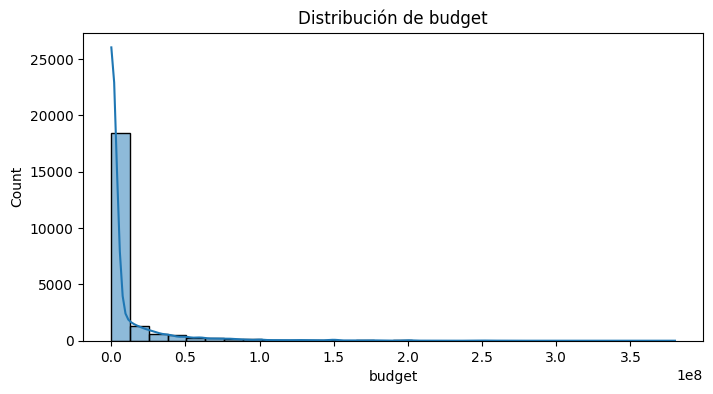

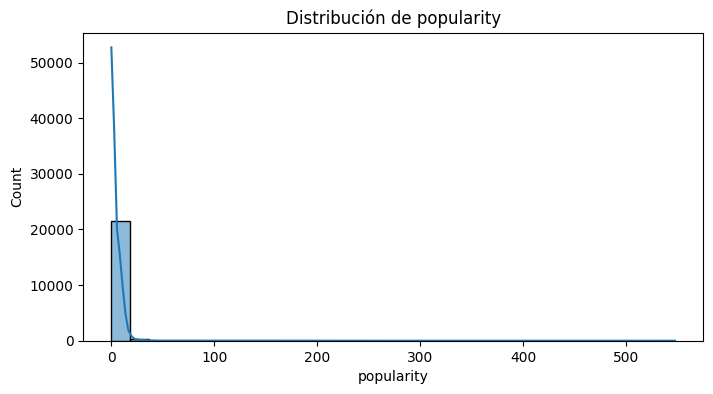

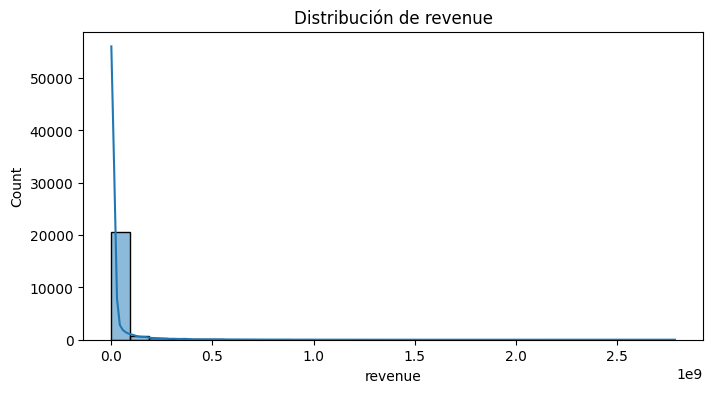

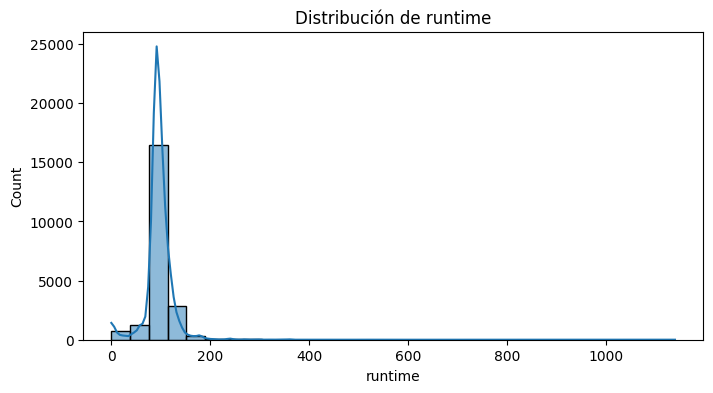

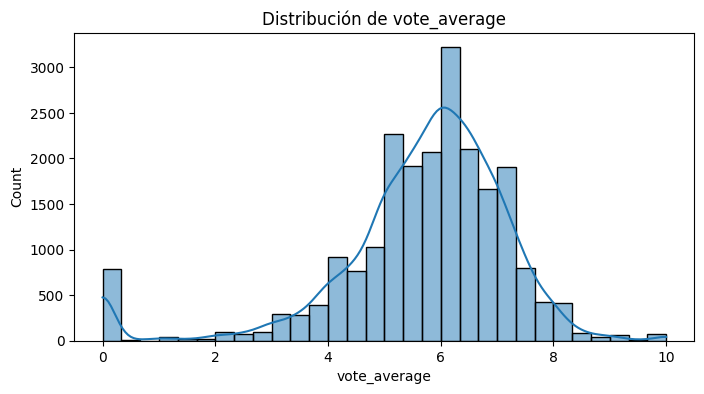

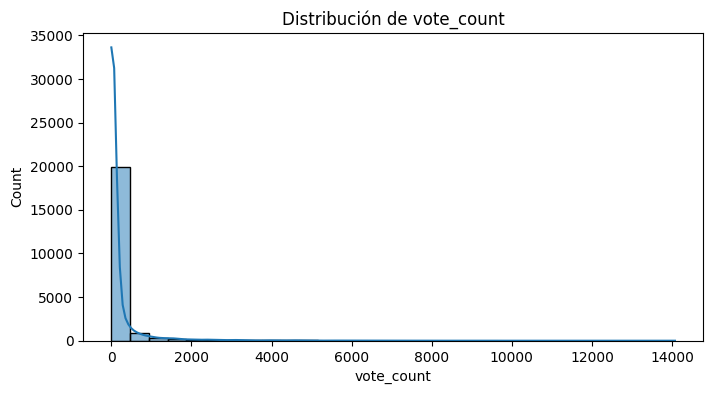

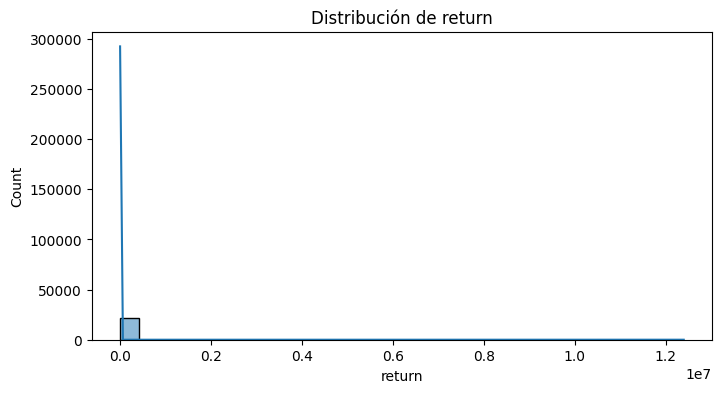

In [22]:
# Visualización de variables numéricas
numerical_cols = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']

# Histograma de cada variable numérica
for col in numerical_cols:
    plt.style.use('default')
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].fillna(0), kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.show()

Análisis de correlacion de las variables númericas

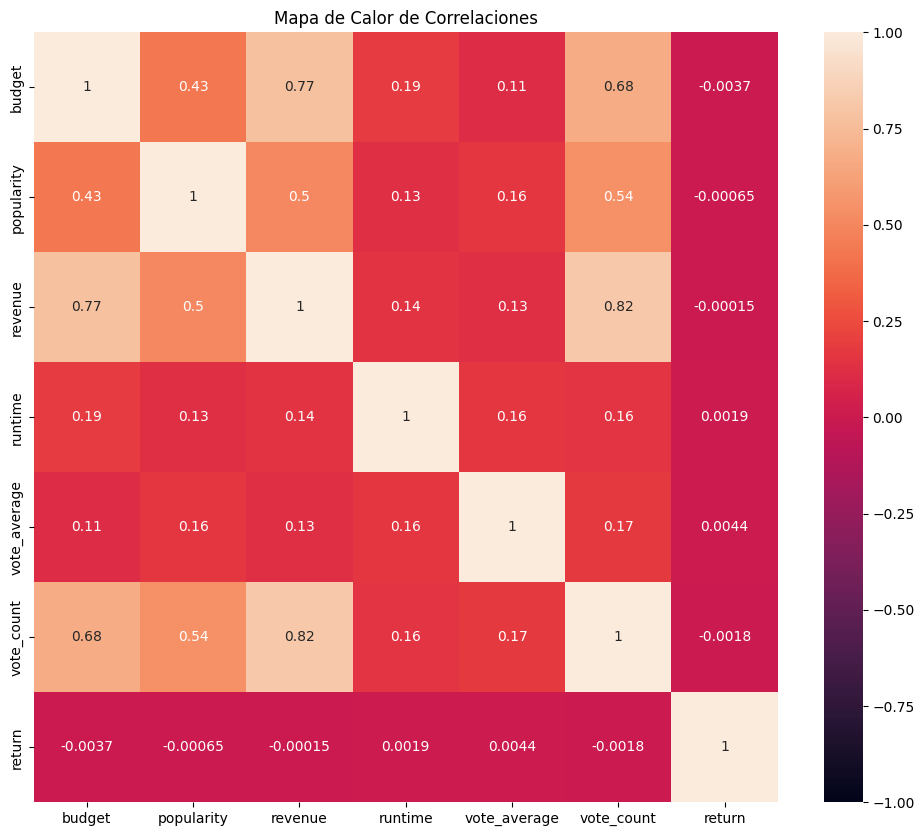

In [26]:
# Mapa de calor para visualizar correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, vmax=1, vmin=-1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Análisis de la cantidad de películas por fecha de lanzamiento

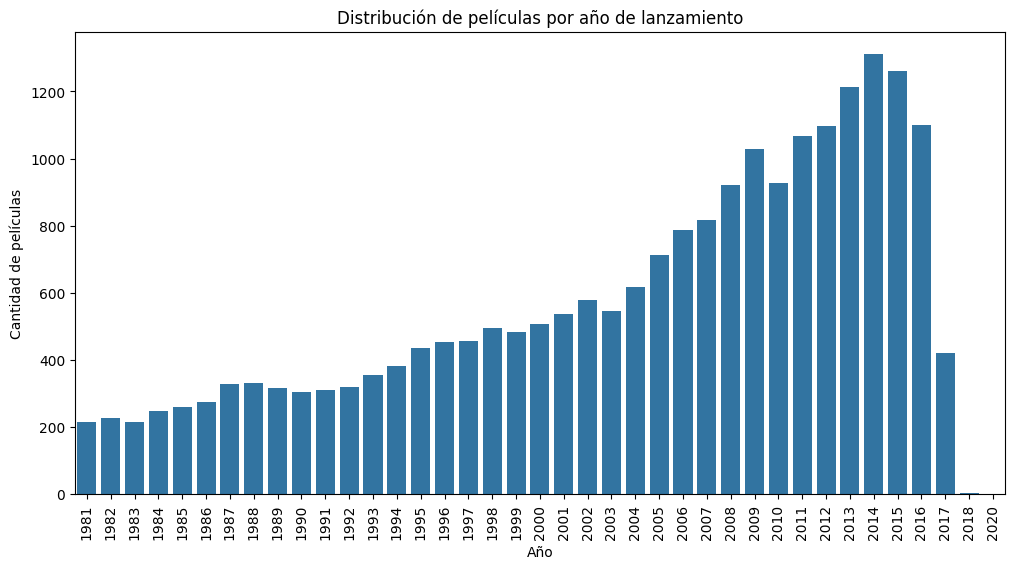

In [24]:
# Conteo de películas por año de lanzamiento
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

# Visualización del conteo de películas por año
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()))
plt.title('Distribución de películas por año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=90)
plt.show()

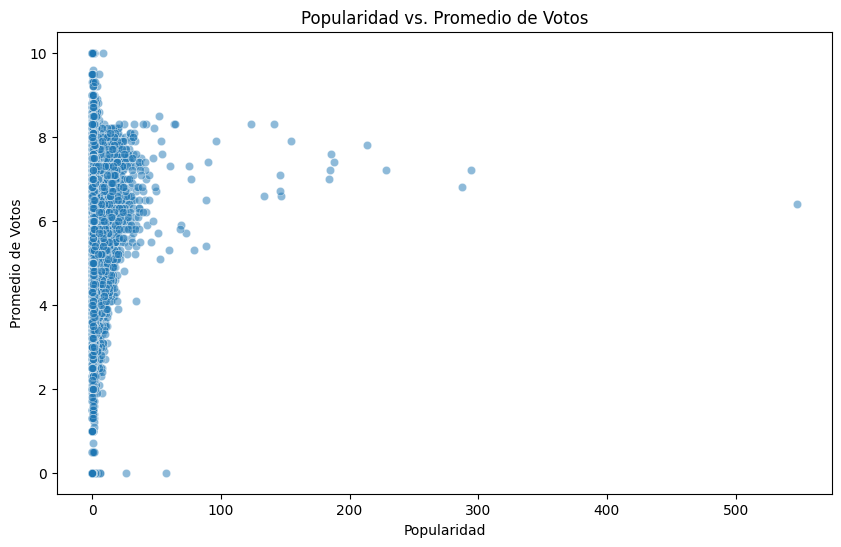

In [25]:
# Visualización de popularidad vs. promedio de votos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='vote_average', alpha=0.5)
plt.title('Popularidad vs. Promedio de Votos')
plt.xlabel('Popularidad')
plt.ylabel('Promedio de Votos')
plt.show()

Análisis de sentimiento 

In [32]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Descargar los stopwords en español e inglés
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to C:\Users\JS
[nltk_data]     Digital\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
# procesamiento de txt
# Limpiamos el texto de la columna `overview`
df['overview_clean'] = df['overview'].fillna('').str.lower().str.replace(r'[^\w\s]', '').str.replace(r'\d+', '')

In [34]:
# Función para obtener la polaridad del sentimiento
def obtener_sentimiento(texto):
    return TextBlob(texto).sentiment.polarity

# Aplicamos la función a la columna de `overview_clean`
df['sentimiento'] = df['overview_clean'].apply(obtener_sentimiento)

# Visualizamos un resumen estadístico del análisis de sentimientos
print(df['sentimiento'].describe())

count    21875.000000
mean         0.048545
std          0.213082
min         -1.000000
25%         -0.050000
50%          0.033333
75%          0.166667
max          1.000000
Name: sentimiento, dtype: float64


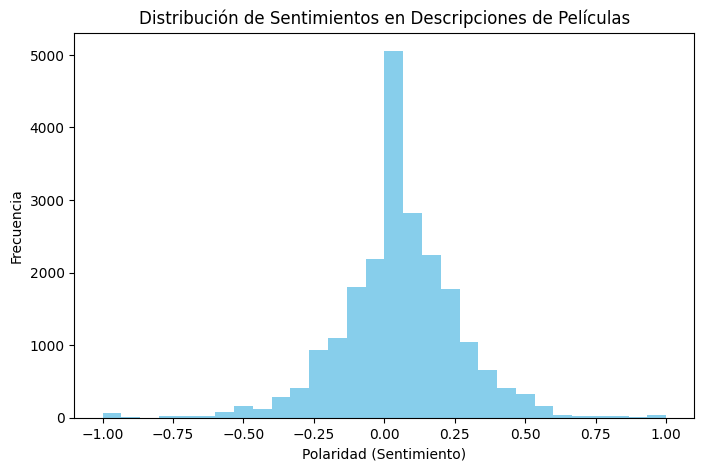

In [35]:
# Histograma de la polaridad del sentimiento
plt.figure(figsize=(8, 5))
plt.hist(df['sentimiento'], bins=30, color='skyblue')
plt.title('Distribución de Sentimientos en Descripciones de Películas')
plt.xlabel('Polaridad (Sentimiento)')
plt.ylabel('Frecuencia')
plt.show()

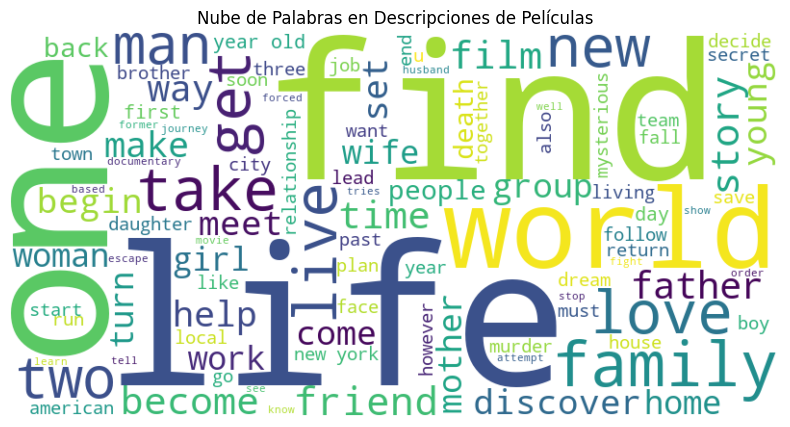

In [36]:
# Concatenamos todas las descripciones en un solo texto
texto_nube = ' '.join(df['overview_clean'])

# Creamos la nube de palabras
nube_palabras = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate(texto_nube)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Descripciones de Películas')
plt.show()

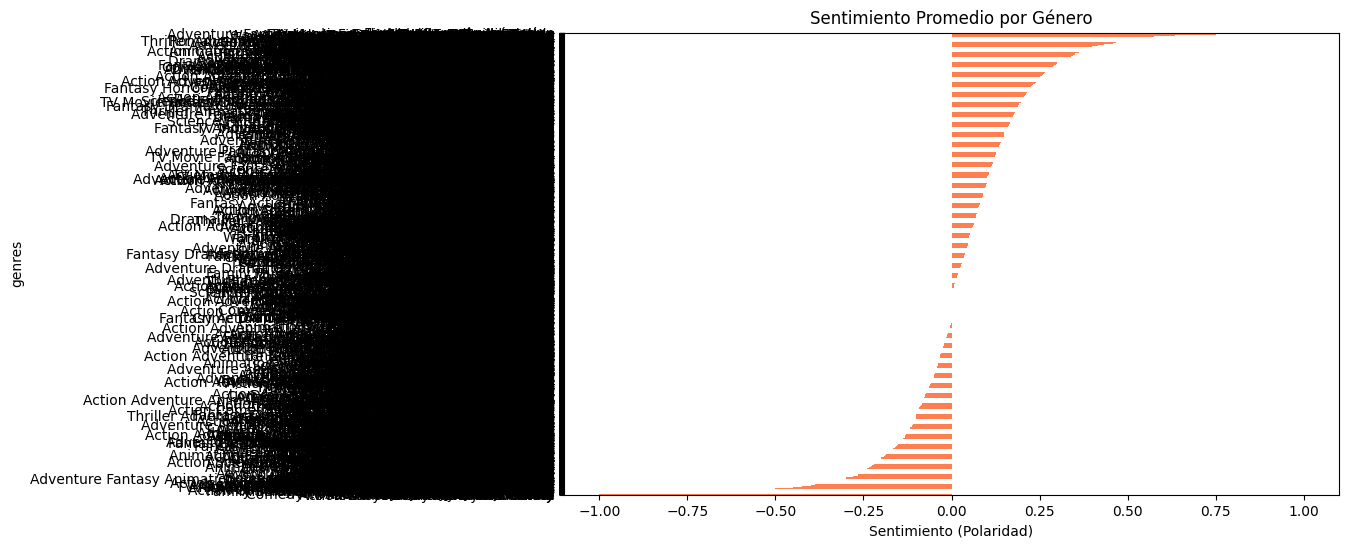

In [37]:
# Supongamos que `genres` es una lista de géneros en cada registro
# Expandimos la lista de géneros a múltiples filas para análisis específico
df_genres = df[['genres', 'sentimiento']].explode('genres')

# Calculamos el sentimiento promedio por género
sentimiento_por_genero = df_genres.groupby('genres')['sentimiento'].mean()

# Visualizamos el sentimiento promedio por género
sentimiento_por_genero.sort_values().plot(kind='barh', figsize=(10, 6), color='coral')
plt.title('Sentimiento Promedio por Género')
plt.xlabel('Sentimiento (Polaridad)')
plt.show()

Guarda el df en formato parquet para realizar el modelo

In [20]:
#df['todo']=df['overview']+df['genres']

In [21]:
#df.head(2)

,id,belongs_to_collection,budget,genres,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,actor,director,return,todo
0,862,Toy Story Collection,30000000,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,Toy Story,7.7,5415.0,1995,Tom Hanks Tim Allen Don Rickles,John Lasseter,12.451801,"Led by Woody, Andy's toys live happily in his ..."
1,8844,No collecction,65000000,Adventure Fantasy Family,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures Teitler Film Interscope Commu...,United States of America,1995-12-15,262797249.0,104.0,English Français,Jumanji,6.9,2413.0,1995,Robin Williams Jonathan Hyde Kirsten Dunst,Joe Johnston,4.043035,When siblings Judy and Peter discover an encha...


In [ ]:
# Importamos la clase '' dek módulo 'feature' de la libreria sklearn
from sklear.feature_extraction.text import CountVectorizer

In [ ]:
# Instanciamos un objeto para convertir textos en representaciones númericas, es decir en una matriz de conteo de palabra
m_vect=CountVectorizer(max_features=500, stop_words= 'english')

In [ ]:
# realizamos el proceso de transformacion  de la columna 'tag'
vect= m_vect.fit_transform